In [60]:
# Import libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [61]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns



In [62]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.10000,18.70000,181.000000,3750.000000,1.0
1,0.0,2.0,39.50000,17.40000,186.000000,3800.000000,0.0
2,0.0,2.0,40.30000,18.00000,195.000000,3250.000000,0.0
3,0.0,2.0,43.92193,17.15117,200.915205,4201.754386,2.0
4,0.0,2.0,36.70000,19.30000,193.000000,3450.000000,0.0
...,...,...,...,...,...,...,...
339,2.0,0.0,43.92193,17.15117,200.915205,4201.754386,2.0
340,2.0,0.0,46.80000,14.30000,215.000000,4850.000000,0.0
341,2.0,0.0,50.40000,15.70000,222.000000,5750.000000,1.0
342,2.0,0.0,45.20000,14.80000,212.000000,5200.000000,0.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    float64
 1   island             344 non-null    float64
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    float64
dtypes: float64(7)
memory usage: 18.9 KB


In [64]:
# Label Encoder

for data in df.columns.to_list():
    if df[data].dtype == "object" or df[data].dtype == "category":
        df[data] = LabelEncoder().fit_transform(df[data])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    float64
 1   island             344 non-null    float64
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    float64
dtypes: float64(7)
memory usage: 18.9 KB


In [66]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.10000,18.70000,181.000000,3750.000000,1.0
1,0.0,2.0,39.50000,17.40000,186.000000,3800.000000,0.0
2,0.0,2.0,40.30000,18.00000,195.000000,3250.000000,0.0
3,0.0,2.0,43.92193,17.15117,200.915205,4201.754386,2.0
4,0.0,2.0,36.70000,19.30000,193.000000,3450.000000,0.0
...,...,...,...,...,...,...,...
339,2.0,0.0,43.92193,17.15117,200.915205,4201.754386,2.0
340,2.0,0.0,46.80000,14.30000,215.000000,4850.000000,0.0
341,2.0,0.0,50.40000,15.70000,222.000000,5750.000000,1.0
342,2.0,0.0,45.20000,14.80000,212.000000,5200.000000,0.0


In [67]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
X_features = df[["island", "bill_length_mm",	"bill_depth_mm",	"flipper_length_mm", "body_mass_g", "sex"]]
y_target = df["species"]

In [70]:
#import our train test and split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.20, random_state=42)

In [71]:
# fit in the train data

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

In [72]:
K_neighbor = KNeighborsClassifier(n_neighbors=5)

K_neighbor.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
# Make prediction


y_pred = K_neighbor.predict(X_test)

In [74]:
y_pred[0:5]

array([0., 0., 2., 0., 2.])

In [75]:
y_test[0:5]

194    1.0
157    1.0
225    2.0
208    1.0
318    2.0
Name: species, dtype: float64

In [78]:
# Evaluating the model

print("Accuracy", accuracy_score(y_test, y_pred))
print("Confussion_matrix", confusion_matrix(y_test, y_pred))
print("Classification_report", classification_report(y_test, y_pred))

Accuracy 0.6811594202898551
Confussion_matrix [[25  2  5]
 [13  3  0]
 [ 1  1 19]]
Classification_report               precision    recall  f1-score   support

         0.0       0.64      0.78      0.70        32
         1.0       0.50      0.19      0.27        16
         2.0       0.79      0.90      0.84        21

    accuracy                           0.68        69
   macro avg       0.64      0.62      0.61        69
weighted avg       0.65      0.68      0.65        69



In [80]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.10000,18.70000,181.000000,3750.000000,1.0
1,0.0,2.0,39.50000,17.40000,186.000000,3800.000000,0.0
2,0.0,2.0,40.30000,18.00000,195.000000,3250.000000,0.0
3,0.0,2.0,43.92193,17.15117,200.915205,4201.754386,2.0
4,0.0,2.0,36.70000,19.30000,193.000000,3450.000000,0.0
...,...,...,...,...,...,...,...
339,2.0,0.0,43.92193,17.15117,200.915205,4201.754386,2.0
340,2.0,0.0,46.80000,14.30000,215.000000,4850.000000,0.0
341,2.0,0.0,50.40000,15.70000,222.000000,5750.000000,1.0
342,2.0,0.0,45.20000,14.80000,212.000000,5200.000000,0.0


In [86]:
# Model

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

GaussianNB()

In [87]:
# Prediction 

y_pred = nb_model.predict(X_test)

In [88]:
y_pred[0:5]

array([1., 1., 2., 1., 2.])

In [89]:
y_test[0:5]

194    1.0
157    1.0
225    2.0
208    1.0
318    2.0
Name: species, dtype: float64

In [90]:
print(f"Accuracy score for Naive Bayes Model: {round(accuracy_score(y_test, y_pred), 2)}%")

Accuracy score for Naive Bayes Model: 0.97%


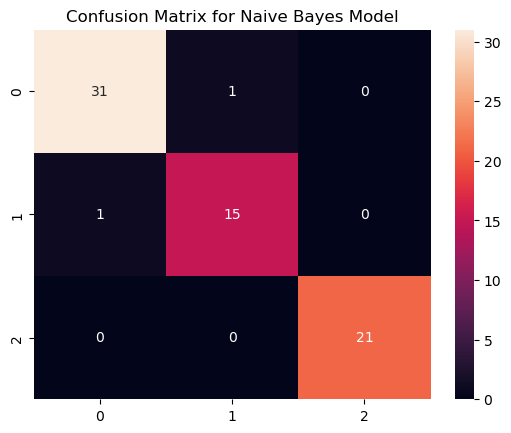

In [91]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [93]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [94]:
y_pred = dt.predict(X_test)

In [95]:
print(f"Accuracy score for Naive Bayes Model: {round(accuracy_score(y_test, y_pred), 2)}%")

Accuracy score for Naive Bayes Model: 0.96%


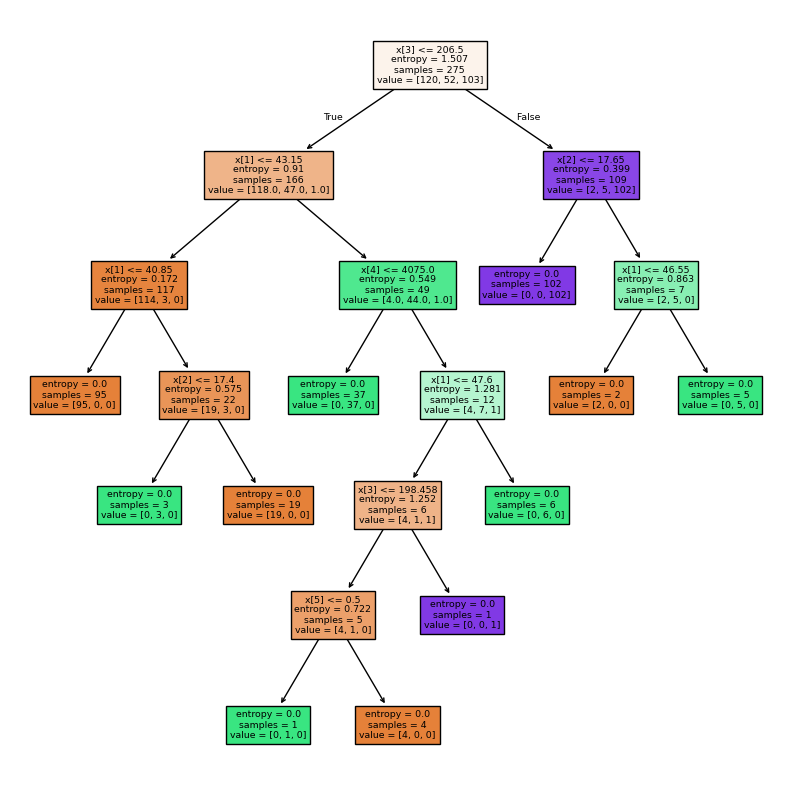

In [96]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(dt.fit(X_train, y_train),filled= True)
plt.show()